In [50]:
import pandas
import numpy
import networkx
from matplotlib import pyplot as plt
import pickle

In [2]:
pickle_in = open("nets.p","rb")
nets = pickle.load(pickle_in)
for key in nets:
    print(key)

95
90
85
80
70
65
60
55


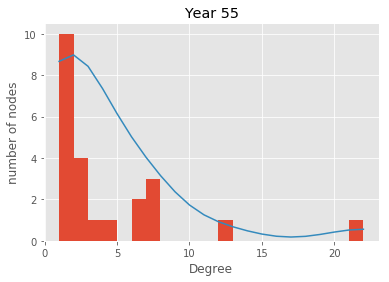

In [38]:
import matplotlib.mlab as mlab
import scipy.stats as stats

keys = list(nets)[7]
G = nets[keys]
degrees = [G.degree(n) for n in G.nodes()]
density = stats.gaussian_kde(degrees)
n, x, _ = plt.hist(degrees,bins=range(1,max(degrees)+1))
plt.title(f"Year {str(keys)}")
plt.xlabel("Degree")
plt.ylabel("number of nodes")
plt.plot(x, density(x)*sum(x)/3)
plt.savefig(f"year{str(keys)}.png")
plt.show()

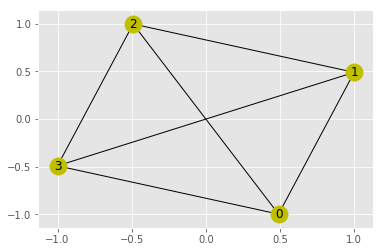

In [49]:
g = networkx.random_graphs.gnp_random_graph(4,1)
networkx.draw_networkx(g,node_color = "y")
plt.savefig("com.png")

In [72]:
# calculate the average shortest path
keys = list(nets)[-1::-1]
L = []
Lp = []
for net in keys:
    tempL = networkx.algorithms.average_shortest_path_length(nets[net])
    L.append(tempL)
    counter = 0
    while True:
        randomG = networkx.random_graphs.gnp_random_graph(len(nets[net]),.4)
        tempLp = networkx.algorithms.average_shortest_path_length(randomG)
        if tempLp < tempL:
            break
        print(f"i've tried {counter+1}th time(s)")
        counter += 1
    Lp.append(tempLp)

i've tried 1th time(s)
i've tried 2th time(s)
i've tried 3th time(s)
i've tried 4th time(s)
i've tried 5th time(s)
i've tried 6th time(s)
i've tried 7th time(s)


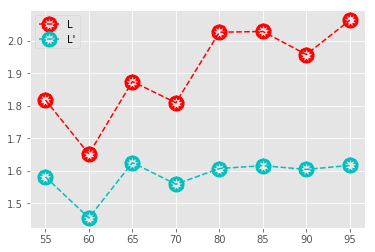

In [76]:
import matplotlib.path as mpath
import numpy as np

keyss = [str(i) for i in keys]

plt.style.use("ggplot")
star = mpath.Path.unit_regular_star(9)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)

plt.plot(keyss,L, '--r', marker=cut_star, markersize=15,label = "L")
plt.plot(keyss,Lp, '--c', marker=cut_star, markersize=15,label = "L'")
plt.legend()
plt.savefig("l.png")
plt.show()

In [77]:
L

[1.8181818181818181,
 1.6515151515151516,
 1.875,
 1.8095238095238095,
 2.026936026936027,
 2.029220779220779,
 1.9582491582491584,
 2.0638418079096046]

In [103]:
# let's compute clustering coeffitont 

keys = list(nets)[-1::-1]
C = []
Cp = []
for net in keys:
    tempL = networkx.algorithms.cluster.clustering(nets[net])
    tempL = numpy.mean(list(tempL.values()))
    C.append(tempL)
    randomG = networkx.random_graphs.gnp_random_graph(len(nets[net]),.4)
    tempLp = networkx.algorithms.cluster.clustering(randomG)
    tempLp = numpy.mean(list(tempLp.values()))
    Cp.append(tempLp)

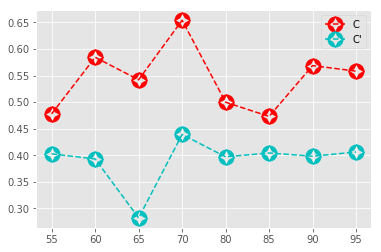

In [105]:
keys = list(nets)[-1::-1]
keyss = [str(i) for i in keys]

star = mpath.Path.unit_regular_star(4)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)

plt.plot(keyss,C, '--r', marker=cut_star, markersize=15,label = "C")
plt.plot(keyss,Cp, '--c', marker=cut_star, markersize=15,label = "C'")
plt.legend()
plt.savefig("c.png")
# plt.show()

In [108]:
C

[0.47788443440617356,
 0.5844516594516594,
 0.5420670832435538,
 0.6542381860563679,
 0.49982160582639057,
 0.473003332687228,
 0.568804112111849,
 0.5583214167945337]

In [159]:
# calculate top 5,10 and 20% of top nodes
five = []
ten = []
twenty = []

keys = list(nets)[-1::-1]
for key in keys:
    num_of_edges = list(nets[key].degree)
    num_of_edges = sorted(num_of_edges,key = lambda x:x[1],reverse=True)
    
    allEdges = nets[key].number_of_edges()*2
    
    lnet = len(nets[key])
    f = int(round(.05 * lnet))
    t = int(round(.1 * lnet))
    tw = int(round(.2 * lnet))
    
    ftemp = num_of_edges[:f]
    ftemp = sum([i[1] for i in ftemp])
    five.append((ftemp/allEdges)*100)
    
    ttemp = num_of_edges[:t]
    ttemp = sum([i[1] for i in ttemp])
    ten.append((ttemp/allEdges)*100)
    
    twtemp = num_of_edges[:tw]
    twtemp = sum([i[1] for i in twtemp])
    twenty.append((twtemp/allEdges)*100)

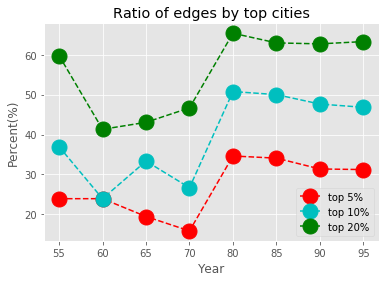

In [166]:
keys = list(nets)[-1::-1]
keyss = [str(i) for i in keys]

# star = mpath.Path.unit_regular_star(4)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices])
codes = np.concatenate([circle.codes])
cut_star = mpath.Path(verts, codes)

plt.plot(keyss,five, '--r', marker=cut_star, markersize=15,label = "top 5%")
plt.plot(keyss,ten, '--c', marker=cut_star, markersize=15,label = "top 10%")
plt.plot(keyss,twenty, '--g', marker=cut_star, markersize=15,label = "top 20%")
plt.xlabel("Year")
plt.ylabel("Percent(%)")
plt.title("Ratio of edges by top cities")
plt.legend()
plt.savefig("ratio.png")
# plt.show()

In [45]:
# centrality
# degree
# closeness
# between-ness
close = []
between = []
deg = []

for key in list(nets)[-1::-1]:
    print(f"we are in the year : {key}")
    
    # close-ness centrality
    closeness = networkx.algorithms.centrality.closeness_centrality(nets[key])
    closeness = sorted(closeness.items(),key = lambda x:x[1])
    closeness = [i[1] for i in closeness]
    closeness = numpy.array(closeness)
    
    num = sum(max(closeness) - closeness)
    denum = (len(nets[key]) - 1)*(max(closeness) - min(closeness))
    close.append(num/denum)
    
    # between-ness centrality
    betweenness = networkx.algorithms.centrality.betweenness_centrality(nets[key])
    betweenness = sorted(betweenness.items(),key = lambda x:x[1])
    betweenness = [i[1] for i in betweenness]
    betweenness = numpy.array(betweenness)
    
    num = sum(max(betweenness) - betweenness)
    denum = (len(nets[key]) - 1)*(max(betweenness) - min(betweenness))
    between.append(num/denum)
    
    #degree-centrality
    degree = networkx.algorithms.centrality.degree_centrality(nets[key])
    degree = sorted(degree.items(),key = lambda x:x[1])
    degree = [i[1] for i in degree]
    degree = numpy.array(degree)
    
    num = sum(max(degree) - degree)
    denum = (len(nets[key]) - 1)*(max(degree) - min(degree))
    deg.append(num/denum)

we are in the year : 55
we are in the year : 60
we are in the year : 65
we are in the year : 70
we are in the year : 80
we are in the year : 85
we are in the year : 90
we are in the year : 95


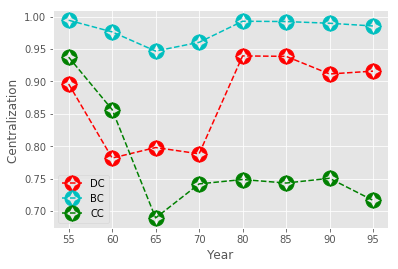

In [49]:
keys = list(nets)[-1::-1]
keyss = [str(i) for i in keys]

import matplotlib.path as mpath
import numpy as np

plt.style.use("ggplot")

star = mpath.Path.unit_regular_star(4)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)

plt.plot(keyss,deg, '--r', marker=cut_star, markersize=15,label = "DC")
plt.plot(keyss,between, '--c', marker=cut_star, markersize=15,label = "BC")
plt.plot(keyss,close, '--g', marker=cut_star, markersize=15,label = "CC")
plt.xlabel("Year")
plt.ylabel("Centralization ")
plt.legend()
plt.savefig("cent.png")
# plt.show()

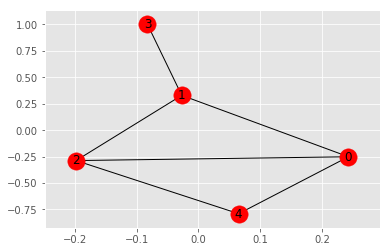

In [69]:
# example 
g = networkx.random_graphs.gnp_random_graph(5,.6)
networkx.draw_networkx(g)

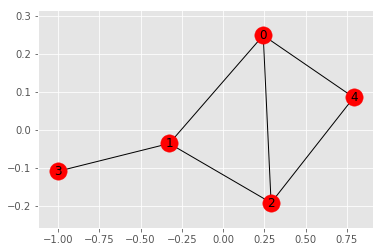

In [71]:
networkx.draw_networkx(g)
plt.savefig('example.png')

In [72]:
networkx.algorithms.centrality.degree_centrality(g)

{0: 0.75, 1: 0.75, 2: 0.75, 3: 0.25, 4: 0.5}

In [73]:
networkx.algorithms.centrality.closeness_centrality(g)

{0: 0.8, 1: 0.8, 2: 0.8, 3: 0.5, 4: 0.5714285714285714}

In [87]:
networkx.algorithms.centrality.betweenness_centrality(g)

{0: 0.16666666666666666, 1: 0.5, 2: 0.16666666666666666, 3: 0.0, 4: 0.0}

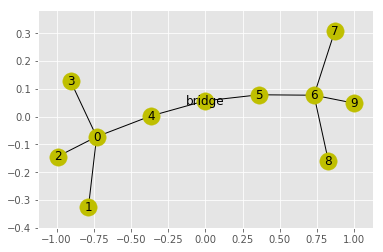

In [85]:
t = networkx.Graph()
t.add_edge(0,1)
t.add_edge(0,2)
t.add_edge(0,3)
t.add_edge(0,4)
t.add_edge(4,"bridge")
t.add_edge("bridge",5)
t.add_edge(5,6)
t.add_edge(6,7)
t.add_edge(6,8)
t.add_edge(6,9)
networkx.draw_networkx(t,node_color = "y")
plt.savefig("exe.png")
# plt.show()

In [86]:
networkx.algorithms.centrality.betweenness_centrality(t)

{0: 0.5333333333333333,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.5333333333333333,
 'bridge': 0.5555555555555556,
 5: 0.5333333333333333,
 6: 0.5333333333333333,
 7: 0.0,
 8: 0.0,
 9: 0.0}

In [89]:
for d,b,c,year in zip(deg,between,close,keys):
    print(f"year {year}: degree: {d},between: {b}, close: {c}")

year 55: degree: 0.8961038961038962,between: 0.9944797865791095, close: 0.9375041445587475
year 60: degree: 0.781818181818182,between: 0.9764966740576497, close: 0.8565583075335397
year 65: degree: 0.7980769230769231,between: 0.9468911917098447, close: 0.6894614556809279
year 70: degree: 0.7883597883597883,between: 0.9604334635455696, close: 0.741950522703799
year 80: degree: 0.9394290123456793,between: 0.9929537104291833, close: 0.7487372589595045
year 85: degree: 0.9387755102040813,between: 0.9924555645341742, close: 0.7432727780686499
year 90: degree: 0.91156462585034,between: 0.9898494431429694, close: 0.75059987700345
year 95: degree: 0.915960451977401,between: 0.9856246998573327, close: 0.7165535180414148


In [116]:
key = 95
networkx.algorithms.centrality.degree_centrality(nets[key])

{'Abu Musa': 0.01694915254237288,
 'Bandar Abbas': 0.2542372881355932,
 'Arak': 0.03389830508474576,
 'Persian Gulf': 0.1694915254237288,
 'Mashhad': 0.5932203389830508,
 'Ardabil': 0.03389830508474576,
 'Mhrabadthran': 0.8305084745762712,
 'Orumieh': 0.03389830508474576,
 'Esfahan': 0.3220338983050847,
 'Gorgan': 0.0847457627118644,
 'Rasht': 0.13559322033898305,
 'Bushehr': 0.13559322033898305,
 'Bahregan': 0.06779661016949153,
 'Browse': 0.11864406779661017,
 'Mahshahr': 0.06779661016949153,
 'Tabriz': 0.15254237288135594,
 'Kharg': 0.1016949152542373,
 'Kerman': 0.1016949152542373,
 'Shiraz': 0.4067796610169492,
 'Qeshm': 0.11864406779661017,
 'Abadan': 0.0847457627118644,
 'Ahvaz': 0.288135593220339,
 'Kish': 0.3050847457627119,
 'Noshahr': 0.03389830508474576,
 'Lavan': 0.05084745762711865,
 'Sari': 0.11864406779661017,
 'Yazd': 0.0847457627118644,
 'Iranshahr': 0.05084745762711865,
 'Bass': 0.03389830508474576,
 'Elam': 0.03389830508474576,
 'Jiroft': 0.03389830508474576,
 'Zabu

In [117]:
networkx.algorithms.centrality.closeness_centrality(nets[key])

{'Abu Musa': 0.36419753086419754,
 'Bandar Abbas': 0.5673076923076923,
 'Arak': 0.42142857142857143,
 'Persian Gulf': 0.5315315315315315,
 'Mashhad': 0.7108433734939759,
 'Ardabil': 0.49166666666666664,
 'Mhrabadthran': 0.855072463768116,
 'Orumieh': 0.49166666666666664,
 'Esfahan': 0.59,
 'Gorgan': 0.5086206896551724,
 'Rasht': 0.5315315315315315,
 'Bushehr': 0.5267857142857143,
 'Bahregan': 0.4796747967479675,
 'Browse': 0.5,
 'Mahshahr': 0.5042735042735043,
 'Tabriz': 0.5363636363636364,
 'Kharg': 0.49166666666666664,
 'Kerman': 0.5175438596491229,
 'Shiraz': 0.6210526315789474,
 'Qeshm': 0.5175438596491229,
 'Abadan': 0.5130434782608696,
 'Ahvaz': 0.5784313725490197,
 'Kish': 0.5841584158415841,
 'Noshahr': 0.4306569343065693,
 'Lavan': 0.4796747967479675,
 'Sari': 0.5267857142857143,
 'Yazd': 0.5130434782608696,
 'Iranshahr': 0.3430232558139535,
 'Bass': 0.472,
 'Elam': 0.49166666666666664,
 'Jiroft': 0.472,
 'Zabul': 0.5,
 'AGHAJARI': 0.4645669291338583,
 'Bojnoord': 0.4645669291

In [118]:
networkx.algorithms.centrality.betweenness_centrality(nets[key])

{'Abu Musa': 0.0,
 'Bandar Abbas': 0.03994670340374605,
 'Arak': 0.0,
 'Persian Gulf': 0.009055087065022773,
 'Mashhad': 0.23899557485179926,
 'Ardabil': 0.0,
 'Mhrabadthran': 0.5954767470986058,
 'Orumieh': 0.0,
 'Esfahan': 0.01884653920013359,
 'Gorgan': 0.0001948178453146308,
 'Rasht': 0.0002597571270861744,
 'Bushehr': 0.001740372751477369,
 'Bahregan': 0.0,
 'Browse': 0.008791155269822716,
 'Mahshahr': 0.0,
 'Tabriz': 0.000677223938474669,
 'Kharg': 0.00037572013024964507,
 'Kerman': 0.0001948178453146308,
 'Shiraz': 0.06169602849906765,
 'Qeshm': 0.00025048008683309673,
 'Abadan': 0.0,
 'Ahvaz': 0.02257451782583285,
 'Kish': 0.06589852773371184,
 'Noshahr': 0.0,
 'Lavan': 0.0,
 'Sari': 0.0002597571270861744,
 'Yazd': 0.0,
 'Iranshahr': 0.0008766803039158386,
 'Bass': 0.008105813921126599,
 'Elam': 0.0,
 'Jiroft': 0.008105813921126599,
 'Zabul': 0.01651777017060478,
 'AGHAJARI': 0.0,
 'Bojnoord': 0.0,
 'Kermanshah': 0.000677223938474669,
 'Chabahar': 0.00023378141437755697,
 'Leng

In [131]:
key = 95
num_of_edges = list(nets[key].degree)
num_of_edges = sorted(num_of_edges,key = lambda x:x[1],reverse=True)

allEdges = nets[key].number_of_edges()*2

lnet = len(nets[key])
f = int(round(.05 * lnet))
t = int(round(.1 * lnet))
tw = int(round(.2 * lnet))

ftemp = num_of_edges[:f]
# ftemp = sum([i[1] for i in ftemp])
# five.append((ftemp/allEdges)*100)

ttemp = num_of_edges[:t]
# ttemp = sum([i[1] for i in ttemp])
# ten.append((ttemp/allEdges)*100)

twtemp = num_of_edges[:tw]
# twtemp = sum([i[1] for i in twtemp])
# twenty.append((twtemp/allEdges)*100)
print(ftemp)
print(ttemp)
print(twtemp)

[('Mhrabadthran', 49), ('Mashhad', 35), ('Shiraz', 24)]
[('Mhrabadthran', 49), ('Mashhad', 35), ('Shiraz', 24), ('Esfahan', 19), ('Kish', 18), ('Ahvaz', 17)]
[('Mhrabadthran', 49), ('Mashhad', 35), ('Shiraz', 24), ('Esfahan', 19), ('Kish', 18), ('Ahvaz', 17), ('Bandar Abbas', 15), ('Persian Gulf', 10), ('Tabriz', 9), ('Rasht', 8), ('Bushehr', 8), ('Browse', 7)]
